# 1. Data Collection

This notebook collects and prepares posts from two subreddits using [Pushshift's API](https://github.com/pushshift/api). 

#### Data Collection

- Was enough data gathered to generate a significant result?
- Was data collected that was useful and relevant to the project?
- Was data collection and storage optimized through custom functions, pipelines, and/or automation?
- Was thought given to the server receiving the requests such as considering number of requests per second?

#### Data Cleaning and EDA

- Are missing values imputed/handled appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [369]:
# imports
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### Collect and save data for r/weddingplanning and r/divorce

In [303]:
def collect_posts(subreddit):
    """ This function pulls down data from a given subreddit using the Pushshift API and returns the 
    data as a Pandas DataFrame.
    
    args:
        subreddit (str): name of a subreddit
    
    return:
        df (Pandas DataFrame): information from the 4000 most recent posts with text before Thursday, April 21, 2022 8:55:21 PM
    """

    url = 'https://api.pushshift.io/reddit/search/submission'
    
    num_posts = 0
    min_date = 1650599721
    for x in range(40):
        params = {
            'subreddit':subreddit,
            'size':100,
            'is_self':True,
            'meta_data':True,
            'before':min_date
        }
        res = requests.get(url, params)
        if res.status_code == 200:
            posts = pd.DataFrame(res.json()['data'])
            min_date = posts['created_utc'].min()
            if x == 0:
                df = posts
            else:
                df = pd.concat([df,posts],)
            time.sleep(1)
        else:
            print('request_failed')
            return df
    return df

In [304]:
# These function calls were used to collect and save the data

# df_wedding = collect_posts('weddingplanning')

# df_wedding.to_csv('../datasets/wedding.csv')

# df_divorce = collect_posts('divorce')

# df_divorce.to_csv('../datasets/divorce.csv')

#### Exploratory Data Analysis

In [305]:
# Import data frames already pulled from API

df_wedding = pd.read_csv('../datasets/wedding.csv')

df_divorce = pd.read_csv('../datasets/divorce.csv')

In [306]:
df_wedding.shape

(4000, 80)

In [307]:
df_wedding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4000 non-null   int64  
 1   all_awardings                  4000 non-null   object 
 2   allow_live_comments            4000 non-null   bool   
 3   author                         4000 non-null   object 
 4   author_flair_css_class         213 non-null    object 
 5   author_flair_richtext          3988 non-null   object 
 6   author_flair_text              213 non-null    object 
 7   author_flair_type              3988 non-null   object 
 8   author_fullname                3988 non-null   object 
 9   author_is_blocked              4000 non-null   bool   
 10  author_patreon_flair           3988 non-null   object 
 11  author_premium                 3988 non-null   object 
 12  awarders                       4000 non-null   o

Will want to drop "Unnamed: 0" column.

In [308]:
# Columns with null values
[x for x in list(zip(df_wedding.columns, df_wedding.isna().sum())) if x[1] != 0]

[('author_flair_css_class', 3787),
 ('author_flair_richtext', 12),
 ('author_flair_text', 3787),
 ('author_flair_type', 12),
 ('author_fullname', 12),
 ('author_patreon_flair', 12),
 ('author_premium', 12),
 ('link_flair_background_color', 75),
 ('link_flair_css_class', 20),
 ('link_flair_template_id', 52),
 ('link_flair_text', 7),
 ('selftext', 164),
 ('removed_by_category', 3308),
 ('author_flair_template_id', 3788),
 ('author_flair_text_color', 3763),
 ('author_cakeday', 3987),
 ('poll_data', 3934),
 ('media_metadata', 3969),
 ('thumbnail_height', 3955),
 ('thumbnail_width', 3955),
 ('suggested_sort', 3956),
 ('post_hint', 3880),
 ('preview', 3880),
 ('author_flair_background_color', 4000),
 ('banned_by', 3997),
 ('edited', 3995),
 ('call_to_action', 4000),
 ('category', 4000)]

In [309]:
df_wedding[['subreddit','selftext','title']].head()

,subreddit,selftext,title
0,weddingplanning,Hello everyone! I’m wondering if it’s common f...,Requiring guest contact info to confirm a rehe...
1,weddingplanning,[removed],Officiant Arriving in Town the Day of Wedding ...
2,weddingplanning,This is one of those things I've never put muc...,How do you find a good officiant?
3,weddingplanning,We’re in the process of booking our May 2023 w...,Each time we hire a vendor we really only have...
4,weddingplanning,I love reading y’alls vents so here’s mine. An...,Vent: So many small things


In [310]:
df_divorce.shape

(3999, 73)

In [311]:
df_divorce[['subreddit','selftext','title']].head()

,subreddit,selftext,title
0,Divorce,"I can’t handle it, the thought of not being hi...",How to cope
1,Divorce,If my child has done something that requires p...,Using different punishments for your children ...
2,Divorce,I think sometimes it’s easy to get caught up i...,What is something you’re looking forward to?
3,Divorce,My wife and I have a pretty comfortable life b...,So... when do you know it's time to move on?
4,Divorce,"Young married couple, no kids, no house (we re...",Could this be relatively simple?


In [312]:
df_divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3999 non-null   int64  
 1   all_awardings                  3999 non-null   object 
 2   allow_live_comments            3999 non-null   bool   
 3   author                         3999 non-null   object 
 4   author_flair_css_class         0 non-null      float64
 5   author_flair_richtext          3997 non-null   object 
 6   author_flair_text              29 non-null     object 
 7   author_flair_type              3997 non-null   object 
 8   author_fullname                3997 non-null   object 
 9   author_is_blocked              3999 non-null   bool   
 10  author_patreon_flair           3997 non-null   object 
 11  author_premium                 3997 non-null   object 
 12  awarders                       3999 non-null   o

In [313]:
# Columns with null values
[x for x in list(zip(df_divorce.columns, df_divorce.isna().sum())) if x[1] != 0]

[('author_flair_css_class', 3999),
 ('author_flair_richtext', 2),
 ('author_flair_text', 3970),
 ('author_flair_type', 2),
 ('author_fullname', 2),
 ('author_patreon_flair', 2),
 ('author_premium', 2),
 ('link_flair_background_color', 2),
 ('link_flair_template_id', 2),
 ('link_flair_text', 2),
 ('removed_by_category', 3508),
 ('post_hint', 3958),
 ('preview', 3958),
 ('call_to_action', 3999),
 ('category', 3999),
 ('edited', 3995),
 ('author_cakeday', 3992),
 ('author_flair_background_color', 3972),
 ('author_flair_template_id', 3972),
 ('author_flair_text_color', 3968),
 ('distinguished', 3997)]

#### Drop Unnamed column

In [314]:
df_wedding.drop(columns=['Unnamed: 0'],inplace=True)

In [315]:
df_divorce.drop(columns=['Unnamed: 0'],inplace=True)

#### Look at post count by unique author

In [316]:
df_wedding['author'].unique()

array(['theallusionist', 'Asleep_Contest2388', 'J3llyDonut', ...,
       'DeadDollKitty', 'sd6887', 'katels28'], dtype=object)

In [317]:
df_wedding['num_posts'] = [df_wedding[df_wedding['author'] == user].shape[0] for user in df_wedding['author']]

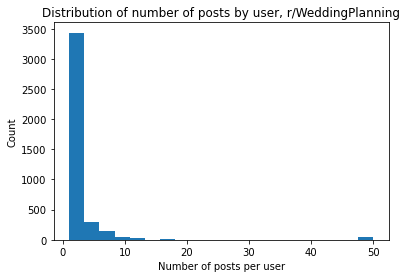

In [318]:
plt.hist(df_wedding['num_posts'],bins=20)
plt.title('Distribution of number of posts by user, r/WeddingPlanning')
plt.xlabel('Number of posts per user')
plt.ylabel('Count');

There is a weird outlier is an author that posts prolifically. Let's explore this.

In [319]:
df_wedding[df_wedding['num_posts']==50].head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,thumbnail_width,suggested_sort,post_hint,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts
70,[],False,AutoModerator,NaN,[],NaN,text,t2_6l4z3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
71,[],False,AutoModerator,NaN,[],NaN,text,t2_6l4z3,False,False,...,NaN,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50


This is written by an AutoModerator, so perhaps these posts aren't relevant?

In [320]:
df_wedding[df_wedding['num_posts']==50]['selftext'].head(5)

70     This is a weekly thread for a more collaborati...
71     Discuss anything on your mind with your fellow...
168    Discuss anything on your mind with your fellow...
290    Discuss anything on your mind with your fellow...
386    Discuss anything on your mind with your fellow...
Name: selftext, dtype: object

Confirmed: These posts are not relevant. Let's drop all posts from the author 'AutoModerator'.

In [321]:
df_wedding[df_wedding['author'] == 'AutoModerator'].index

Int64Index([  70,   71,  168,  290,  386,  448,  507,  579,  652,  653,  765,
             862,  956, 1071, 1151, 1222, 1312, 1313, 1411, 1516, 1607, 1692,
            1746, 1832, 1833, 1921, 1922, 2025, 2144, 2264, 2359, 2438, 2515,
            2609, 2610, 2720, 2814, 2923, 2999, 3062, 3151, 3245, 3361, 3478,
            3579, 3674, 3789, 3881, 3986, 3987],
           dtype='int64')

In [322]:
df_wedding.drop(index=df_wedding[df_wedding['author'] == 'AutoModerator'].index,inplace=True)

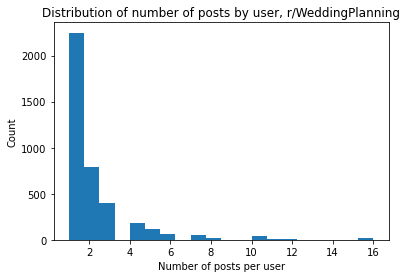

In [323]:
plt.hist(df_wedding['num_posts'],bins=20)
plt.title('Distribution of number of posts by user, r/WeddingPlanning')
plt.xlabel('Number of posts per user')
plt.ylabel('Count');

In [324]:
df_wedding[df_wedding['num_posts']==16]['selftext']

63      I apologize if this is a dumb question but I a...
570     When I was growing up, my grandmother practica...
868     Hi, all.\nI’m looking to see if anyone has any...
1079    I’ve decided on my chairs that I will have at ...
1425    Hello!\nNeed help planning the wedding again 🤣...
1519    My fiancé and I are getting married in the spr...
1628    So, unfortunately the venue does not provide c...
2018    It’s such a big relief to me that today I fina...
2426    Alright so… I really want my guests to have a ...
2990    An update to my last post, about how I’ve been...
3042    I just wanted to come on here and voice my fru...
3144    Hey all. I need some advice again as I go furt...
3356    Hey y’all. I’m wondering if rehearsal dinners ...
3590    What can I expect making it okay to bring chil...
3664    My fiancé and I finally decided on a date, y’a...
3702    Hey everyone. I’m wondering if anyone knows wh...
Name: selftext, dtype: object

The next most prolific poster seems to be real, so we'll leave them alone.

Let's check out divorce now.

In [325]:
df_divorce['author'].unique()

array(['NebulaSky5', 'johnnyjacoby86', 'l0852', ..., 'btmbusby',
       'MinnCali', 'Pleasant-Series1472'], dtype=object)

In [326]:
df_divorce['num_posts'] = [df_divorce[df_divorce['author'] == user].shape[0] for user in df_divorce['author']]

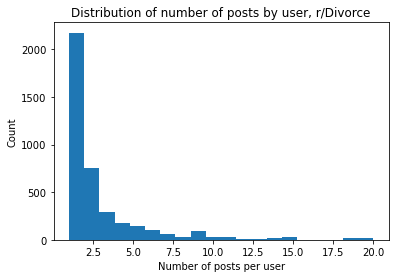

In [327]:
plt.hist(df_divorce['num_posts'],bins=20)
plt.title('Distribution of number of posts by user, r/Divorce')
plt.xlabel('Number of posts per user')
plt.ylabel('Count');

In [328]:
df_divorce[df_divorce['num_posts']==20]['selftext']

824     I almost feel hatred for him and his kids and ...
913     And starts trying to love bomb me and shit, bu...
975     One minute wants to claim me as his wife as if...
1057    Talked to my husband today about his last phon...
1062    I just got a text from a local number pretendi...
1115                   Right now it seems he’s in denial.
1174    The only thing keeping me sane is God and look...
1209    He’s refusing to give me more. Im out of gas a...
2170    Told me he’s done and living the single life a...
2261     He laughed and said that’s probably for the best
3056    Because it seems he’s still fucking his ex wif...
3112    It was a nightmare! It would have made a humor...
3431    Well I assumed we’d live apart until we could ...
3469    A little hard to accept, but it is truthful an...
3504    &amp; is very unlike him to go more than a ful...
3530    I can’t even communicate with my husband witho...
3575    26f married 48m have been married 6 months and...
3806          

No regular moderators in divorce, just a prolific writer. Nothing to drop here.

#### Should we drop posts where selftext == [removed]?

In [329]:
df_wedding.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_sub

In [330]:
df_wedding[df_wedding['selftext']=='[removed]']['title']

1       Officiant Arriving in Town the Day of Wedding ...
5       Wedding in 3mo, just ruptured my Achilles’ tendon
17                                     The Preferred List
34                         Tipping on top of service fee?
40                                     Am I in the wrong?
                              ...                        
3978                                        Wedding date…
3992               Has anyone ordered from Jamali Garden?
3995    Postponed wedding for 2 years, feeling really ...
3996            Time between Ceremony and Reception...???
3999    Advice on where to find a long sleeve elopemen...
Name: title, Length: 672, dtype: object

These posts still have a title, and it's not obvious that the posts do or do not have additional value, so I will keep them for now. However, I will keep this in mind to add '[removed'] to the stop_words

#### How do we deal with posts with NaN in selftext?

In [331]:
df_wedding['selftext'].isna().sum()

164

In [332]:
df_divorce['selftext'].isna().sum()

0

Let's fill the NaN with 'NA' and use this as a stop_word.

In [333]:
df_wedding['selftext'] = df_wedding['selftext'].fillna('NA')

In [334]:
df_wedding['selftext'].isna().sum()

0

#### Number of unique authors

In [335]:
num_unique_auth = len(df_wedding['author'].unique())
total_posts = df_wedding.shape[0]
print('Number of unique authors in r/WeddingPlanning: ' + str(num_unique_auth))
print('Mean posts per author: ' + str(round(total_posts/num_unique_auth,1)))

Number of unique authors in r/WeddingPlanning: 2871
Mean posts per author: 1.4


In [336]:
num_unique_auth = len(df_divorce['author'].unique())
total_posts = df_divorce.shape[0]
print('Number of unique authors in r/Divorce: ' + str(num_unique_auth))
print('Mean posts per author: ' + str(round(total_posts/num_unique_auth,1)))

Number of unique authors in r/Divorce: 2776
Mean posts per author: 1.4


#### Let's look at length of posts and number of words in each posts.

In [337]:
df_wedding['posts_length'] = df_wedding['selftext'].apply(len)

In [338]:
df_wedding['post_word_count'] = df_wedding['selftext'].apply(str.split).apply(len)

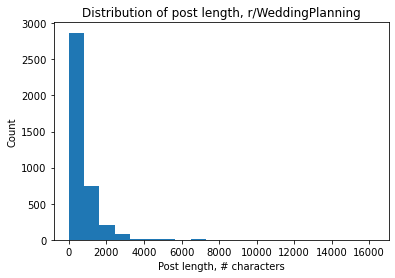

In [339]:
plt.hist(df_wedding['posts_length'],bins=20)
plt.title('Distribution of post length, r/WeddingPlanning')
plt.xlabel('Post length, # characters')
plt.ylabel('Count');

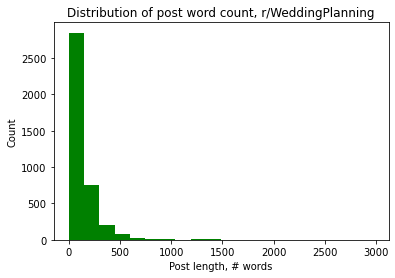

In [340]:
plt.hist(df_wedding['post_word_count'],bins=20,color='g')
plt.title('Distribution of post word count, r/WeddingPlanning')
plt.xlabel('Post length, # words')
plt.ylabel('Count');

In [341]:
df_wedding[df_wedding['posts_length'] > 6000]['selftext']

270     Hi all! For the uninitiated, Jamie Wolfer is a...
597     [First, pictures!](https://imgur.com/a/ZvcNlzt...
637     Sorry for the long post, but the details matte...
682     Hello 👋 and I hope your wedding planning is co...
705     \n\n\nOops, first post deleted as wrong pic fo...
945     TLDR: If you want to have a budget bachelorett...
1131    CW: brief, vague mention of child abuse. \n\n&...
2008    A couple of years ago we got engaged. We were ...
2194    Please don’t leave rude or negative comments, ...
2402    &amp;#x200B;\n\nhttps://preview.redd.it/562afp...
2566    A few months back I made [this pity party post...
3040    &amp;#x200B;\n\nhttps://preview.redd.it/tifv3s...
3318    Hello everyone!\n\nSo I am just about to decid...
3522    We estimated $15,000 at the start when we didn...
3647    My husband and I got married last October afte...
3768    I'm confused y'all. I hope this is the place t...
Name: selftext, dtype: object

These very long posts seem to be real, so I will leave them alone

In [342]:
df_divorce['posts_length'] = df_divorce['selftext'].apply(len)

In [343]:
df_divorce['post_word_count'] = df_divorce['selftext'].apply(str.split).apply(len)

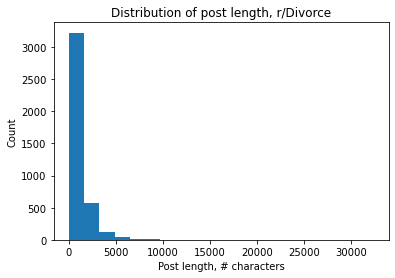

In [344]:
plt.hist(df_divorce['posts_length'],bins=20)
plt.title('Distribution of post length, r/Divorce')
plt.xlabel('Post length, # characters')
plt.ylabel('Count');

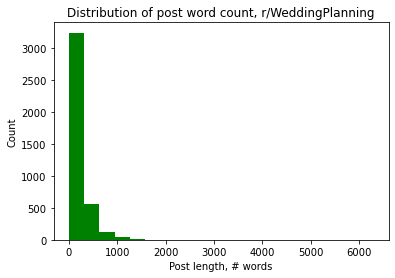

In [345]:
plt.hist(df_divorce['post_word_count'],bins=20,color='g')
plt.title('Distribution of post word count, r/WeddingPlanning')
plt.xlabel('Post length, # words')
plt.ylabel('Count');

In [346]:
df_divorce[df_divorce['posts_length'] > 6000]['selftext']

165     So my STBXW left me in Summer 2019 after a yea...
236     I guess I'm seeking support from this communit...
627     I’ve finally made it. My stbxh comes to pick u...
672     It's been 3 weeks since my last post.  I left ...
711     I haven’t loved him in so long. I haven’t love...
717     I'm so emotionally and physically exhausted th...
972     I had been anticipating the day. I filed back ...
989     Mourning the loss of my marriage pales in comp...
1015    2 summers Ago my grandmother passed away. She ...
1134    Hi there! This is my first post on Reddit and ...
1510    This is going to be a long one, but hopefully ...
1524    Not a throwaway, but an alt account, for obvio...
1668    Sorry this is a little long, and I might sound...
1679    Here's my story and I could really use some wo...
1685       My ex ghost the marriage while working over...
1695    Back when we were in relationship before marri...
1742    Beware, this is something I just pumped out wh...
1746    I’m 16

These also seem real.

#### Let's see if there are any duplicate posts.

In [347]:
df_wedding.shape

(3950, 81)

In [348]:
df_wedding.drop_duplicates(subset=['title'])

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,post_hint,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts,posts_length,post_word_count
0,[],False,theallusionist,NaN,[],NaN,text,t2_7685k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,503,80
1,[],False,Asleep_Contest2388,NaN,[],NaN,text,t2_m8qjrlnv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,1
2,[],False,J3llyDonut,NaN,[],NaN,text,t2_iaek90tb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,752,139
3,[],False,Wednesday_Atoms,NaN,[],NaN,text,t2_ccasgn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1827,342
4,[],False,EudoxiaPrade,NaN,[],NaN,text,t2_itfve,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2211,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,[],False,chestnutflo,NaN,[],NaN,text,t2_eyj6tunl,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,1
3996,[],False,sd6887,NaN,[],NaN,text,t2_jsx7wpp6,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,1
3997,[],False,littlerose639,NaN,[],NaN,text,t2_ji3c7l6f,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,390,68
3998,[],False,katels28,NaN,[],NaN,text,t2_3rlc0zg8,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,612,105


It seems there are a number of duplicates... let's explore those.

In [349]:
post_count = list(zip(df_wedding['selftext'].value_counts().keys(),df_wedding['selftext'].value_counts()))
post_count[0:8]

[('[removed]', 672),
 ('NA', 164),
 ('[deleted]', 9),
 ('My fiancé and I are looking to book our honeymoon and wanted to see if anyone had any planning advise, based on our budget and activities we wish to do. For reference, we’re in our mid-twenties, are active and are open to new experiences, specifically cultural experiences. The overarching details of our trip are as follows:\n\nIsland: Oahu\n\nDates (Including Travel): June 27-July 3 2022\n\nBudget: $4,500\n\nAccommodations: Adult Only Resort (Or AirBnB, if it’s more convenient); Rental Car\n\nExpectations: 40% Relaxation and 60% Adventure/Exploration\n\nActivities of Interest (In No Particular Order): Spa Day; Day/Night Snorkeling/Scuba Diving; Outrigger Canoeing/Kayaking; Zip-Lining; Attend a Luau; Canyoning; Sunset Sailing; Cage Dive with Shark; Spelunking\n\nPlaces of Interest (In No Particular Order): Dole Pineapple Plantation; Diamond Head Crater; Jurassic Park',
  2),
 ("Hi all! My fiance and I are really interested in havi

Most of the duplicates are the removed, NA, or deleted posts, but some are real duplicates. Let's drop these duplicates.

In [350]:
duplicates = [x[0] for x in post_count if x[1] > 1][3::]

In [351]:
duplicates

['My fiancé and I are looking to book our honeymoon and wanted to see if anyone had any planning advise, based on our budget and activities we wish to do. For reference, we’re in our mid-twenties, are active and are open to new experiences, specifically cultural experiences. The overarching details of our trip are as follows:\n\nIsland: Oahu\n\nDates (Including Travel): June 27-July 3 2022\n\nBudget: $4,500\n\nAccommodations: Adult Only Resort (Or AirBnB, if it’s more convenient); Rental Car\n\nExpectations: 40% Relaxation and 60% Adventure/Exploration\n\nActivities of Interest (In No Particular Order): Spa Day; Day/Night Snorkeling/Scuba Diving; Outrigger Canoeing/Kayaking; Zip-Lining; Attend a Luau; Canyoning; Sunset Sailing; Cage Dive with Shark; Spelunking\n\nPlaces of Interest (In No Particular Order): Dole Pineapple Plantation; Diamond Head Crater; Jurassic Park',
 "Hi all! My fiance and I are really interested in having karaoke at our wedding. I'm looking into having a karaoke m

In [352]:
duplicates_index = [df_wedding[df_wedding['selftext']==x].index[1:] for x in duplicates]

In [353]:
duplicates_index

[Int64Index([2398], dtype='int64'), Int64Index([1283], dtype='int64')]

In [354]:
for x in duplicates_index:
    df_wedding.drop(index=x,inplace=True)

##### Now with Divorce

In [355]:
df_divorce.shape

(3999, 75)

In [356]:
df_divorce.drop_duplicates(subset=['title'])

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,category,edited,author_cakeday,author_flair_background_color,author_flair_template_id,author_flair_text_color,distinguished,num_posts,posts_length,post_word_count
0,[],False,NebulaSky5,NaN,[],NaN,text,t2_6xs0432p,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3270,679
1,[],False,johnnyjacoby86,NaN,[],NaN,text,t2_fnduei3c,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,516,104
2,[],False,l0852,NaN,[],NaN,text,t2_1ldum2u,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,450,89
3,[],False,M17603,NaN,[],NaN,text,t2_e0nma86r,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1265,238
4,[],False,Environmental_Pea_62,NaN,[],NaN,text,t2_7jmdpuls,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,266,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,[],False,btmbusby,NaN,[],NaN,text,t2_12l40v,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2055,395
3995,[],False,MinnCali,NaN,[],NaN,text,t2_eumpx3ir,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1049,211
3996,[],False,tinmaridedonpingue,NaN,[],NaN,text,t2_16fxed,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,370,71
3997,[],False,newlife92021,NaN,[],NaN,text,t2_en3mluz8,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1428,268


In [366]:
post_count = list(zip(df_divorce['selftext'].value_counts().keys(),df_divorce['selftext'].value_counts()))
post_count[0:8]

[('[removed]', 489),
 ('I can’t handle it, the thought of not being his wife anymore fucking kills me to the point I can’t sleep or eat or enjoy anything. I’m on vacation at my best friends house states away from him and she’s doing her best to try to make me see how shitty he’s become and that he truly doesn’t care, she’s even gotten me a job to help me make a little money while I’m here so I don’t go back broke and on the streets. He happily allowed me to be thrown out of his parents house and lied to me for months stringing me along even lied to our therapist and I keep making excuses for him and I can’t stop. I can’t stop crying. Nothings working. I feel like ending my life this is so painful. I know we had a whirlwind relationship and moved extremely fast and at the time it felt right, and looking back we should’ve waited to get married. I understand I should’ve gotten a job sooner, or tried harder. But at the end of the day…. He didn’t try at all even when we were going through t

Most of the duplicates are the removed posts, but some are many real duplicates. Let's drop these duplicates.

In [359]:
duplicates = [x[0] for x in post_count if x[1] > 1][1::]

In [361]:
len(duplicates)

15

In [362]:
duplicates_index = [df_divorce[df_divorce['selftext']==x].index[1:] for x in duplicates]

In [ ]:
duplicates_index

[Int64Index([1631], dtype='int64'),
 Int64Index([3803], dtype='int64'),
 Int64Index([2842], dtype='int64'),
 Int64Index([2576], dtype='int64'),
 Int64Index([1495], dtype='int64'),
 Int64Index([2570], dtype='int64'),
 Int64Index([2761], dtype='int64'),
 Int64Index([96], dtype='int64'),
 Int64Index([2559], dtype='int64'),
 Int64Index([897], dtype='int64'),
 Int64Index([172], dtype='int64'),
 Int64Index([3031], dtype='int64'),
 Int64Index([203], dtype='int64'),
 Int64Index([3097], dtype='int64'),
 Int64Index([1206], dtype='int64')]

In [364]:
for x in duplicates_index:
    df_divorce.drop(index=x,inplace=True)

In [365]:
df_divorce.shape

(3984, 75)

### EDA on Word Counts

#### Create own stop words list

In [398]:
add_stop_words = ['NA','[removed]','[deleted]']

In [399]:
stop_words = stopwords.words('english')

In [400]:
for word in add_stop_words:
    stop_words.append(word)

In [403]:
stop_words[-5::]

['wouldn', "wouldn't", 'NA', '[removed]', '[deleted]']

#### Instantiate and fit Count Vectorizer

In [404]:
cv = CountVectorizer(stop_words=stop_words,ngram_range=(1,3))

In [ ]:
cv.fit(df_wedding['selftext']